In [1]:
#Task 1: Classical ML with Scikit-learn — Iris Species Classification
#--- Task 1: Iris Species Classification using Decision Tree ---

# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
# Display first few rows
print("Dataset preview:")
print(df.head())

Dataset preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())  # No missing values in this dataset, but this is standard practice


Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
# Encode labels (though already numeric in this dataset)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [6]:
# Split into features and target
X = df.drop('species', axis=1)
y = df['species']

In [7]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [9]:
# Train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Predict on test set
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')

In [12]:
print(f"\nModel Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")


Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [13]:
#Task 2: Deep Learning with TensorFlow — MNIST CNN Classifier --- CNN for MNIST Digit Classification ---

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [14]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
# Reshape data to add channel dimension (required for Conv2D)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [17]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.8819 - loss: 0.3997 - val_accuracy: 0.9838 - val_loss: 0.0531
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9822 - loss: 0.0577 - val_accuracy: 0.9868 - val_loss: 0.0410
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9891 - loss: 0.0335 - val_accuracy: 0.9890 - val_loss: 0.0373
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9888 - val_loss: 0.0398
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9892 - val_loss: 0.0400


In [20]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9834 - loss: 0.0461

✅ Test Accuracy: 98.70%


In [21]:
# Ensure performance target met
assert test_acc > 0.95, "Model accuracy below target threshold (95%)!"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


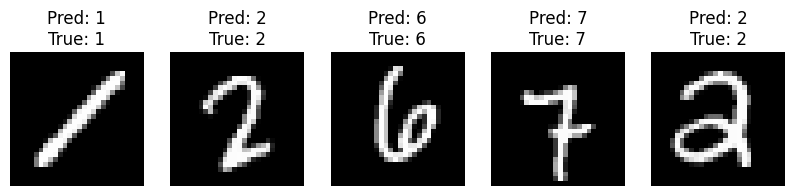

In [22]:
# Visualize predictions for 5 sample images
sample_indices = np.random.choice(len(x_test), 5)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()

In [23]:
#Task 3: NLP with spaCy — NER + Rule-Based Sentiment ---- Named Entity Recognition and Sentiment Analysis with spaCy ---

import spacy
from spacy.matcher import PhraseMatcher

In [24]:
# 2 Load English model
nlp = spacy.load("en_core_web_sm")

In [25]:
# 3 Sample Amazon reviews
reviews = [
    "I love my new Apple iPhone 14, the camera quality is amazing!",
    "The Samsung TV stopped working after 2 months. Terrible experience.",
    "This Sony headphone has incredible sound quality for the price."
]

In [26]:
#3 Create custom phrase matcher for product names/brands
product_list = ["Apple", "iPhone 14", "Samsung", "Sony", "TV", "headphone"]
matcher = PhraseMatcher(nlp.vocab)
patterns = [nlp.make_doc(text) for text in product_list]
matcher.add("PRODUCTS", patterns)

In [27]:
#4 Rule-based sentiment analyzer (very simple example)
positive_words = ["love", "amazing", "great", "incredible", "excellent"]
negative_words = ["terrible", "bad", "poor", "stopped", "broken"]

def analyze_sentiment(text):
    doc = nlp(text.lower())
    pos = sum(word.text in positive_words for word in doc)
    neg = sum(word.text in negative_words for word in doc)
    if pos > neg:
        return "Positive"
    elif neg > pos:
        return "Negative"
    else:
        return "Neutral"

In [28]:
#5 Process and display results
for review in reviews:
    doc = nlp(review)
    matches = matcher(doc)
    entities = [doc[start:end].text for match_id, start, end in matches]
    sentiment = analyze_sentiment(review)
    print(f"\nReview: {review}")
    print(f"Extracted Entities: {entities}")
    print(f"Sentiment: {sentiment}")


Review: I love my new Apple iPhone 14, the camera quality is amazing!
Extracted Entities: ['Apple', 'iPhone 14']
Sentiment: Positive

Review: The Samsung TV stopped working after 2 months. Terrible experience.
Extracted Entities: ['Samsung', 'TV']
Sentiment: Negative

Review: This Sony headphone has incredible sound quality for the price.
Extracted Entities: ['Sony', 'headphone']
Sentiment: Positive
